In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import imblearn as imb

In [12]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [36]:
X, y = pipeline.fit_resample(df.drop('Class', axis=1), df['Class'])

c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


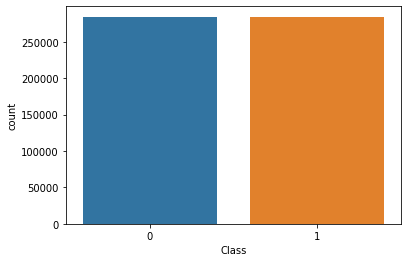

In [37]:
# plot class distribution
sns.countplot(y)
plt.show()

In [38]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
11373/11373 [==============================] - 60s 5ms/step - loss: 19.8532 - accuracy: 0.7967 - val_loss: 0.7303 - val_accuracy: 0.9629
Epoch 2/5
11373/11373 [==============================] - 65s 6ms/step - loss: 3.8793 - accuracy: 0.9242 - val_loss: 0.3571 - val_accuracy: 0.9650
Epoch 3/5
11373/11373 [==============================] - 65s 6ms/step - loss: 1.0662 - accuracy: 0.9440 - val_loss: 0.1121 - val_accuracy: 0.9755
Epoch 4/5
11373/11373 [==============================] - 64s 6ms/step - loss: 0.1935 - accuracy: 0.9565 - val_loss: 0.0881 - val_accuracy: 0.9728
Epoch 5/5
3554/3554 [==============================] - 17s 5ms/step - loss: 0.3049 - accuracy: 0.9035
Test loss: 0.3048613965511322
Test accuracy: 0.9034785628318787


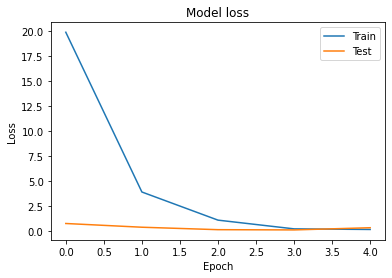

In [46]:
# build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

shape = X_train.shape

model = Sequential()
model.add(Dense(shape[1], activation='relu', input_shape=(shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# evaluate model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

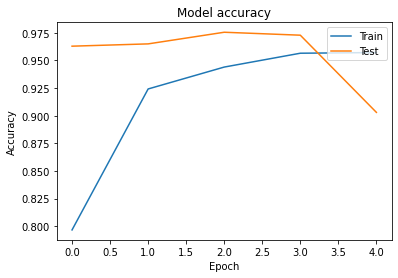

In [47]:
# plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [52]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

history2 = model.fit(X_train_scaled, y_train, batch_size=32, epochs=5, validation_split=0.2)



Epoch 1/5
11373/11373 [==============================] - 69s 6ms/step - loss: 0.0644 - accuracy: 0.9782 - val_loss: 0.0344 - val_accuracy: 0.9875
Epoch 2/5
11373/11373 [==============================] - 81s 7ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.0280 - val_accuracy: 0.9901
Epoch 3/5
11373/11373 [==============================] - 80s 7ms/step - loss: 0.0287 - accuracy: 0.9900 - val_loss: 0.0233 - val_accuracy: 0.9916
Epoch 4/5
11373/11373 [==============================] - 77s 7ms/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.0363 - val_accuracy: 0.9882
Epoch 5/5
11373/11373 [==============================] - 75s 7ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0155 - val_accuracy: 0.9950


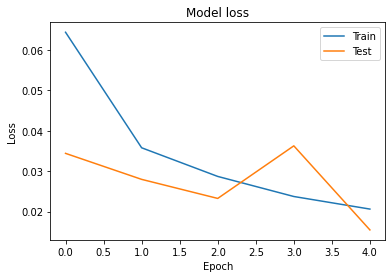

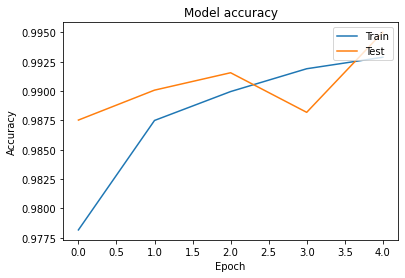

In [53]:
# plot loss and accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

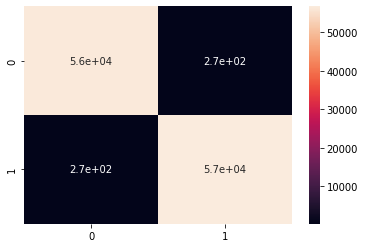

In [56]:
# predict if transaction is fraudulent or not
y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)

# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show() # idk what tf this is